## Bike Sharing Assignment

#### Problem Statement:


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —


- To understand the factors on which the demand for these shared bikes depends.
- To create a linear model that quantitatively relates demand count with variables such as weather situation, workingday/holiday, temperature, etc.
- To know the accuracy of the model, i.e. how well these variables can affect/ predict the demand count of the bikes


In [1]:
#importing all modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


## Reading and Understanding the Data

In [2]:
df = pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualising the Data

Let's now spend some time doing what is arguably the most important step - understanding the data.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

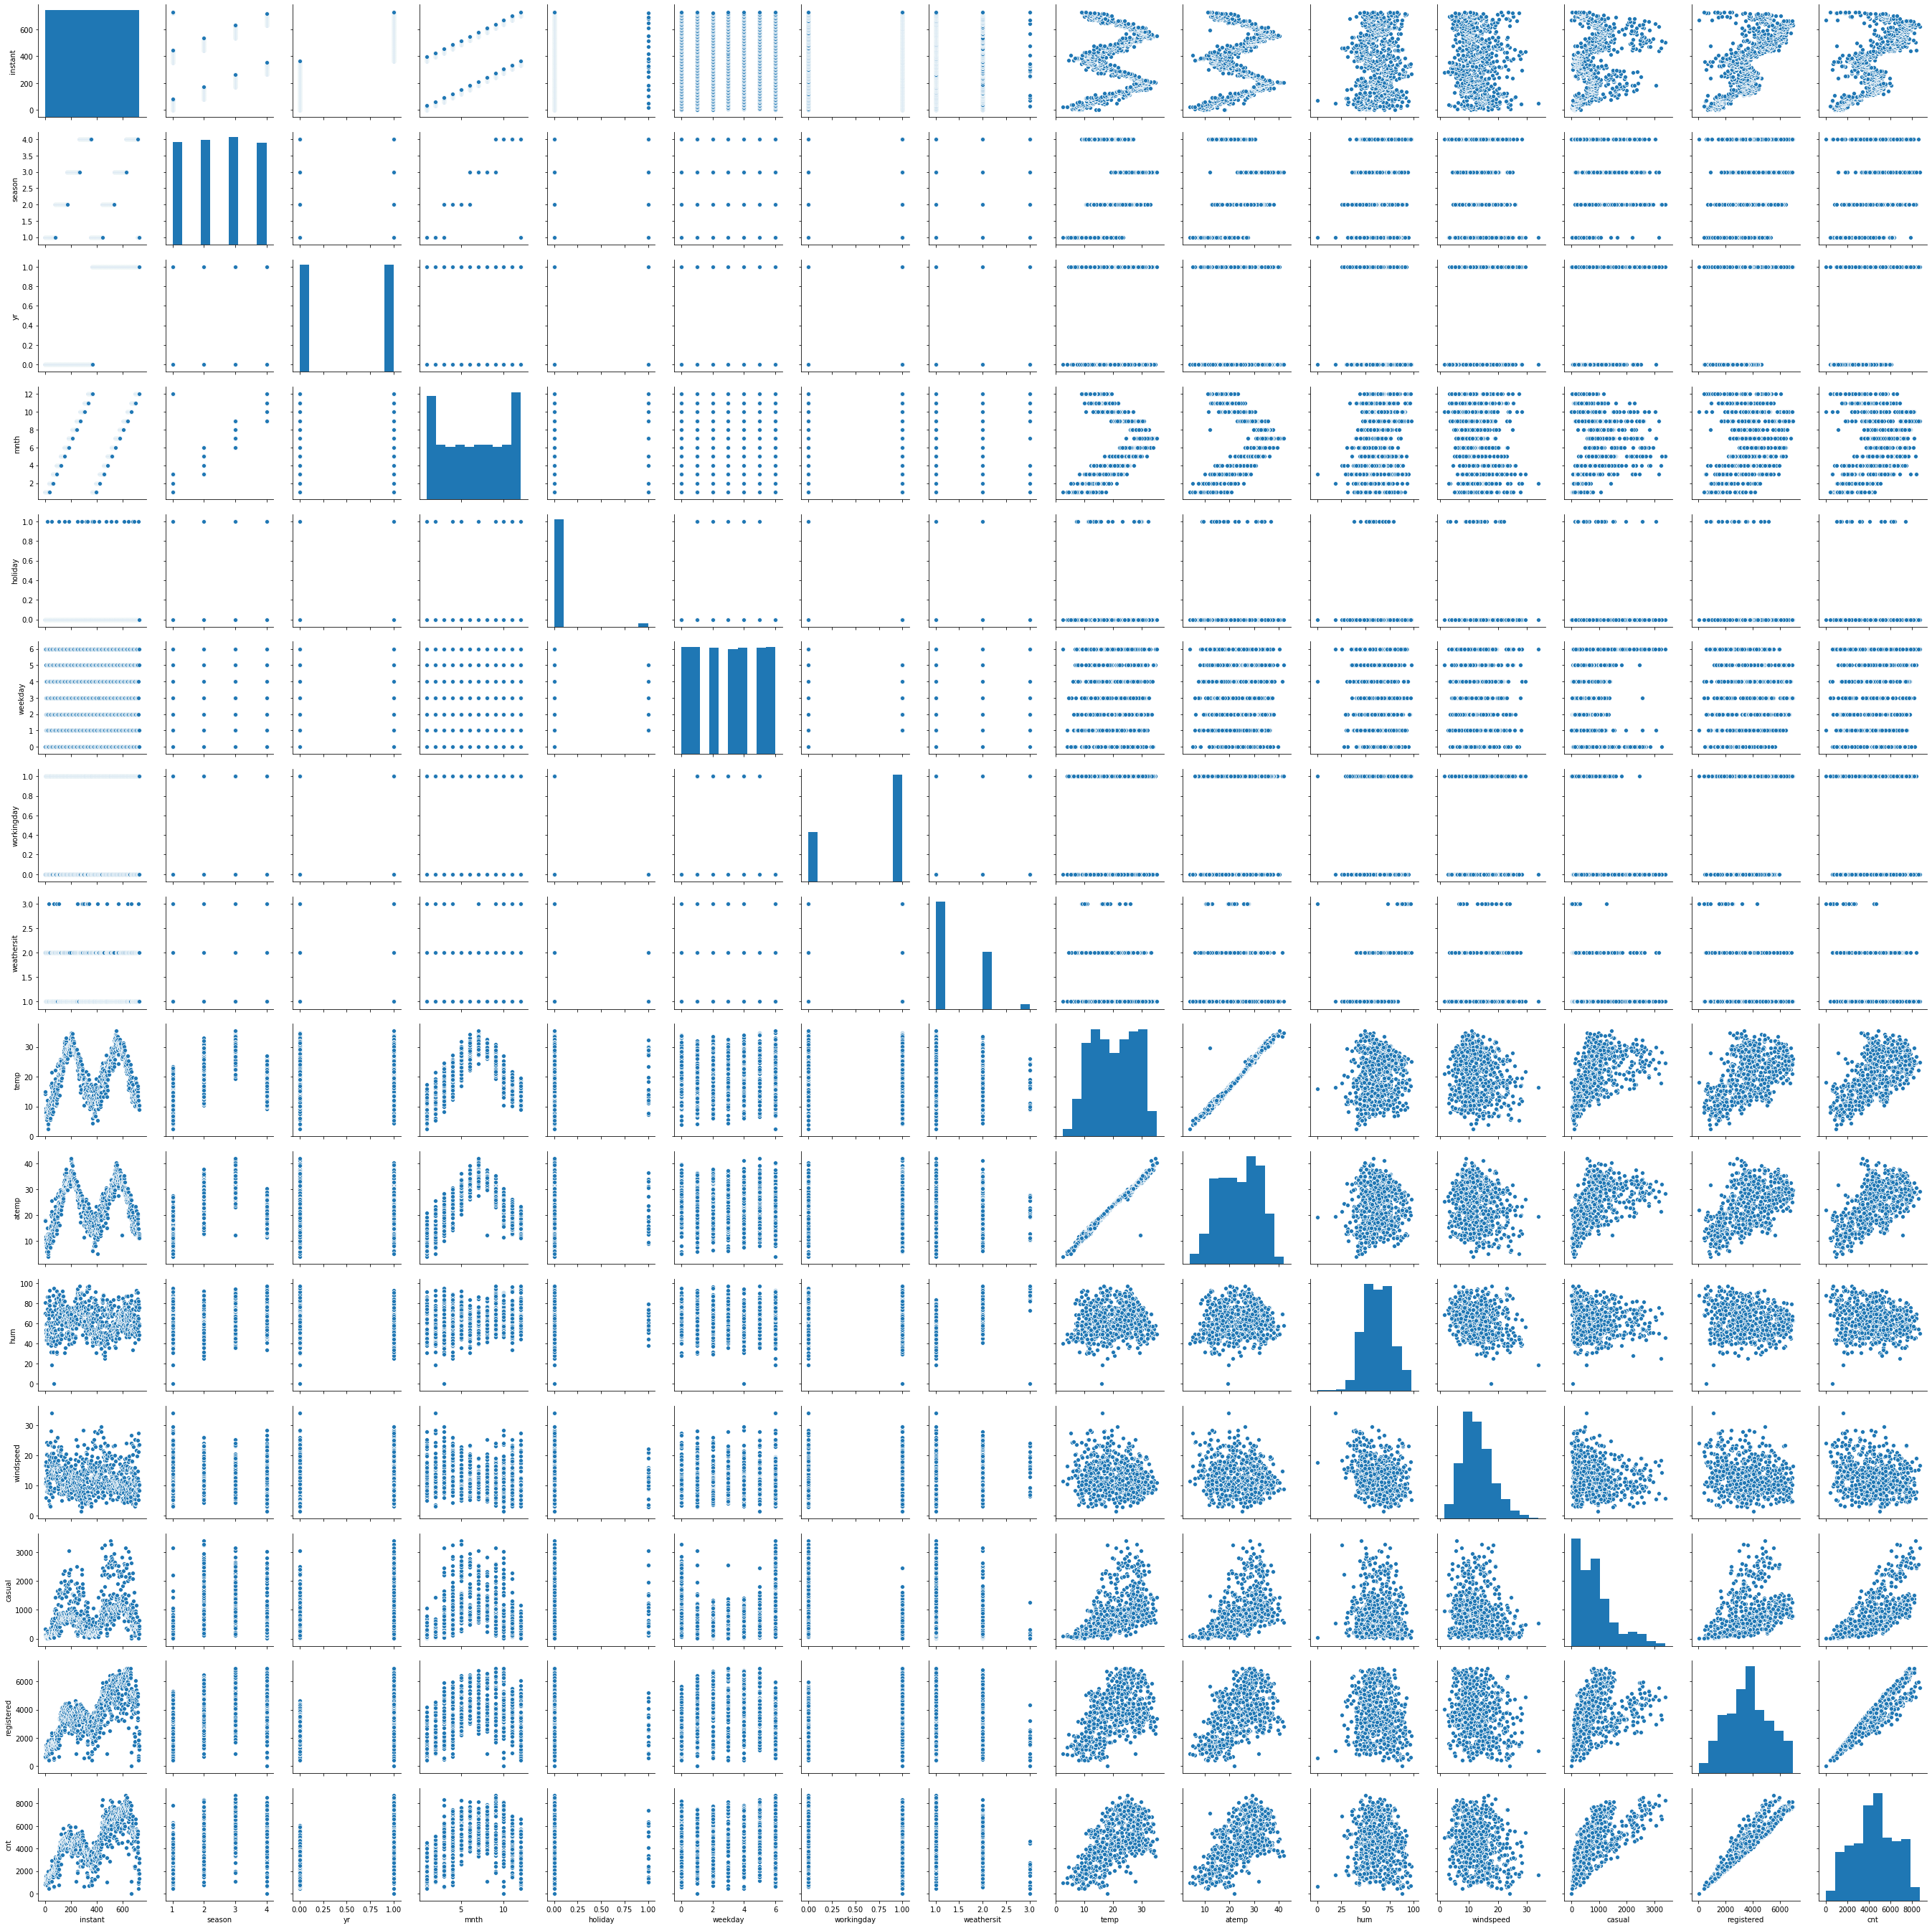

In [7]:
sns.pairplot(df)
plt.show()

**This data is provided because the approach taken here is direct conversion of dummy variables and labelling. Hence, the legend is provided from the below boxplot**

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


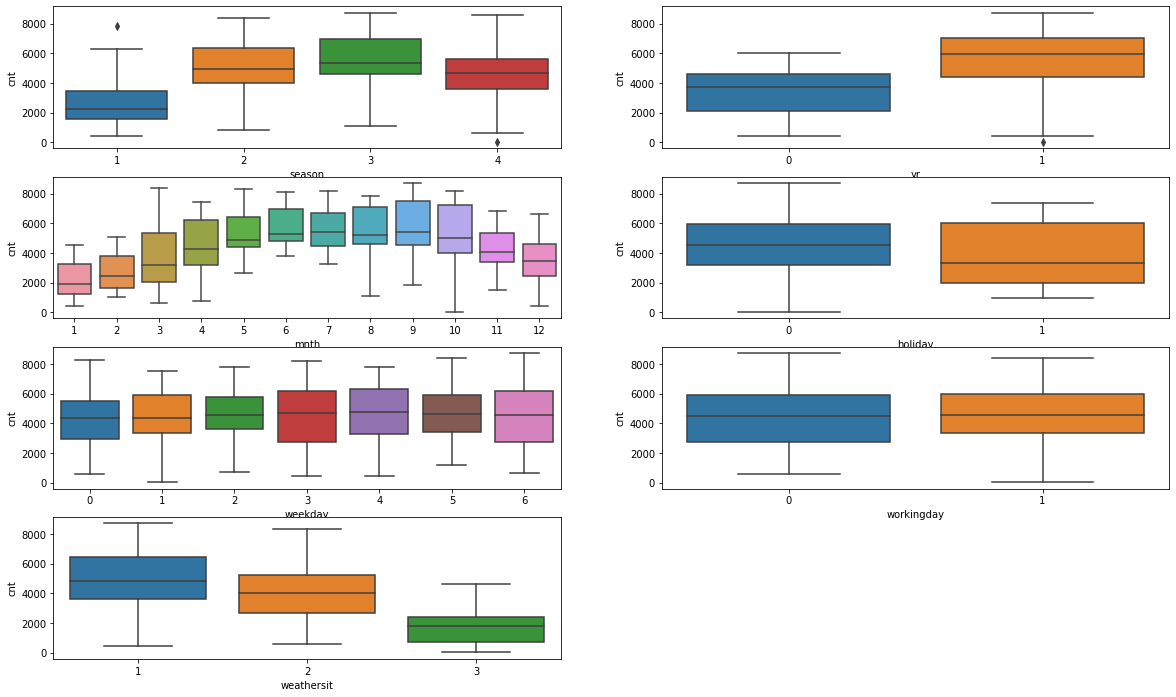

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()


**We will drop dteday variable here, because the variable is expressed or the information is captured by columns (params) such as yr, mnth, weekday**

In [9]:
df.drop("dteday", axis=1, inplace=True)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dummy Variables

In [10]:
 seasondumm = pd.get_dummies(df['season'])

In [11]:
seasondumm.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


**The dummy variables are created, and then the columns represented by 1,2,3,4 are renamed as spring, summer, fall and winter. But since we are good with 3 variables for 4 levels, I assign 000 to spring and is removed (so, not labelling spring in the end)
Now, you don't need 4 columns. You can drop the season column, as the type of season can be identified with just the last two columns where** - 

- 000 will correspond to spring
- 100 will correspond to summer
- 010 will correspond to fall
- 001 will correspond to winter

In [12]:
seasondumm = pd.get_dummies(df['season'], drop_first = True)
seasondumm.rename(columns = {2:'Summer', 3:'Fall',4:'Winter'}, inplace = True)
seasondumm

,Summer,Fall,Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [13]:
df = pd.concat([df, seasondumm], axis = 1)

In [14]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [15]:
df.drop(['season'], axis = 1, inplace = True)

In [16]:
df.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


**Weathersit undergoes dummification here, and in the same way as seasons dummification, the variables can be reduced to 3 and "clear" variable doesn't appear in the end**
- 00 means clear
- 01 means mist + cloudy (just named Mist in the column name)
- 10 means Light rain
- 11 means Heavy rain (There seems to be no data for Heavy rain)

In [17]:
weathersitdumm = pd.get_dummies(df['weathersit'], drop_first = True)
weathersitdumm.rename(columns = {2:'Mist', 3:'Light Rain',4:'Heavy Rain'}, inplace = True)
weathersitdumm.head()

,Mist,Light Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [18]:
df = pd.concat([df, weathersitdumm], axis = 1)
df.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter,Mist,Light Rain
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,2,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,3,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [19]:
df.drop(['weathersit'], axis = 1, inplace = True)
df.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter,Mist,Light Rain
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


**Weekend**
**We do the same to the weekend variable and remove what stands for Sunday, and also the weekday variable itself after concatenating**
- 000000 stands for Sunday
- 100000 stands for Monday
- 010000 stands for Tuesday
- 001000 stands for Wednesday
- 000100 stands for Thursday
- 000010 stands for Friday
- 000001 stands for Saturday

In [20]:
weekdaydumm = pd.get_dummies(df['weekday'], drop_first = True)
weekdaydumm.rename(columns = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6: 'Saturday'}, inplace = True)
weekdaydumm.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [21]:
df = pd.concat([df, weekdaydumm], axis = 1)
df.drop(['weekday'], axis = 1, inplace = True)
df.head()

,instant,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Fall,Winter,Mist,Light Rain,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1,0,1,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,1
1,2,0,1,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,3,0,1,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
3,4,0,1,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,0,1,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,1,0,0,0


**Month undergoes same process and lands up with no mnth column as well as the Jan column because it is assigned to 00000000000**
- 00000000000 is assigned to Jan
- 10000000000 is assigned to Feb
...
- 00000000001 is assigned to Dec

In [22]:
mnthdumm = pd.get_dummies(df['mnth'], drop_first = True)
mnthdumm.rename(columns = {2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7: 'Jul', 8:'Aug' , 9:'Sep' , 10:'Oct', 11:'Nov' , 12:'Dec' }, inplace = True)
mnthdumm.head()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [23]:
df = pd.concat([df, mnthdumm], axis = 1)
df.drop(['mnth'], axis = 1, inplace = True)
df.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


**Here the ommission of certain columns are done. Reasons are**
- Instant is removed because it serves as just unique identification of the data and doesn't serve necessary purpose
- temp and atemp : temp is the actual temperature of the region and atemp is the temperature felt by the audience (who might have participated in some kind of a survey) but since both are relating to the temperature of the region, they tend to have high correlation. Hence, one among the two can be eliminated and I choose to remove temp
- causal and registered : These two variables again tell the number of bikes on demand, also sum would give me the cnt of all the bikes demanded. So, both these variables become the target variable or the y of our demand discussion. Also, 'cnt' variable pretty much captures all of the demand that is created in the market. Hence, we will remove both of the variables

In [24]:
df.drop("instant", axis=1, inplace=True)
df.drop("temp", axis=1, inplace=True)
df.drop("casual", axis=1, inplace=True)
df.drop("registered", axis=1, inplace=True)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Fall,Winter,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
- Here we use MinMaxScaling technique to rescale the values


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [28]:
num_vars = ['atemp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

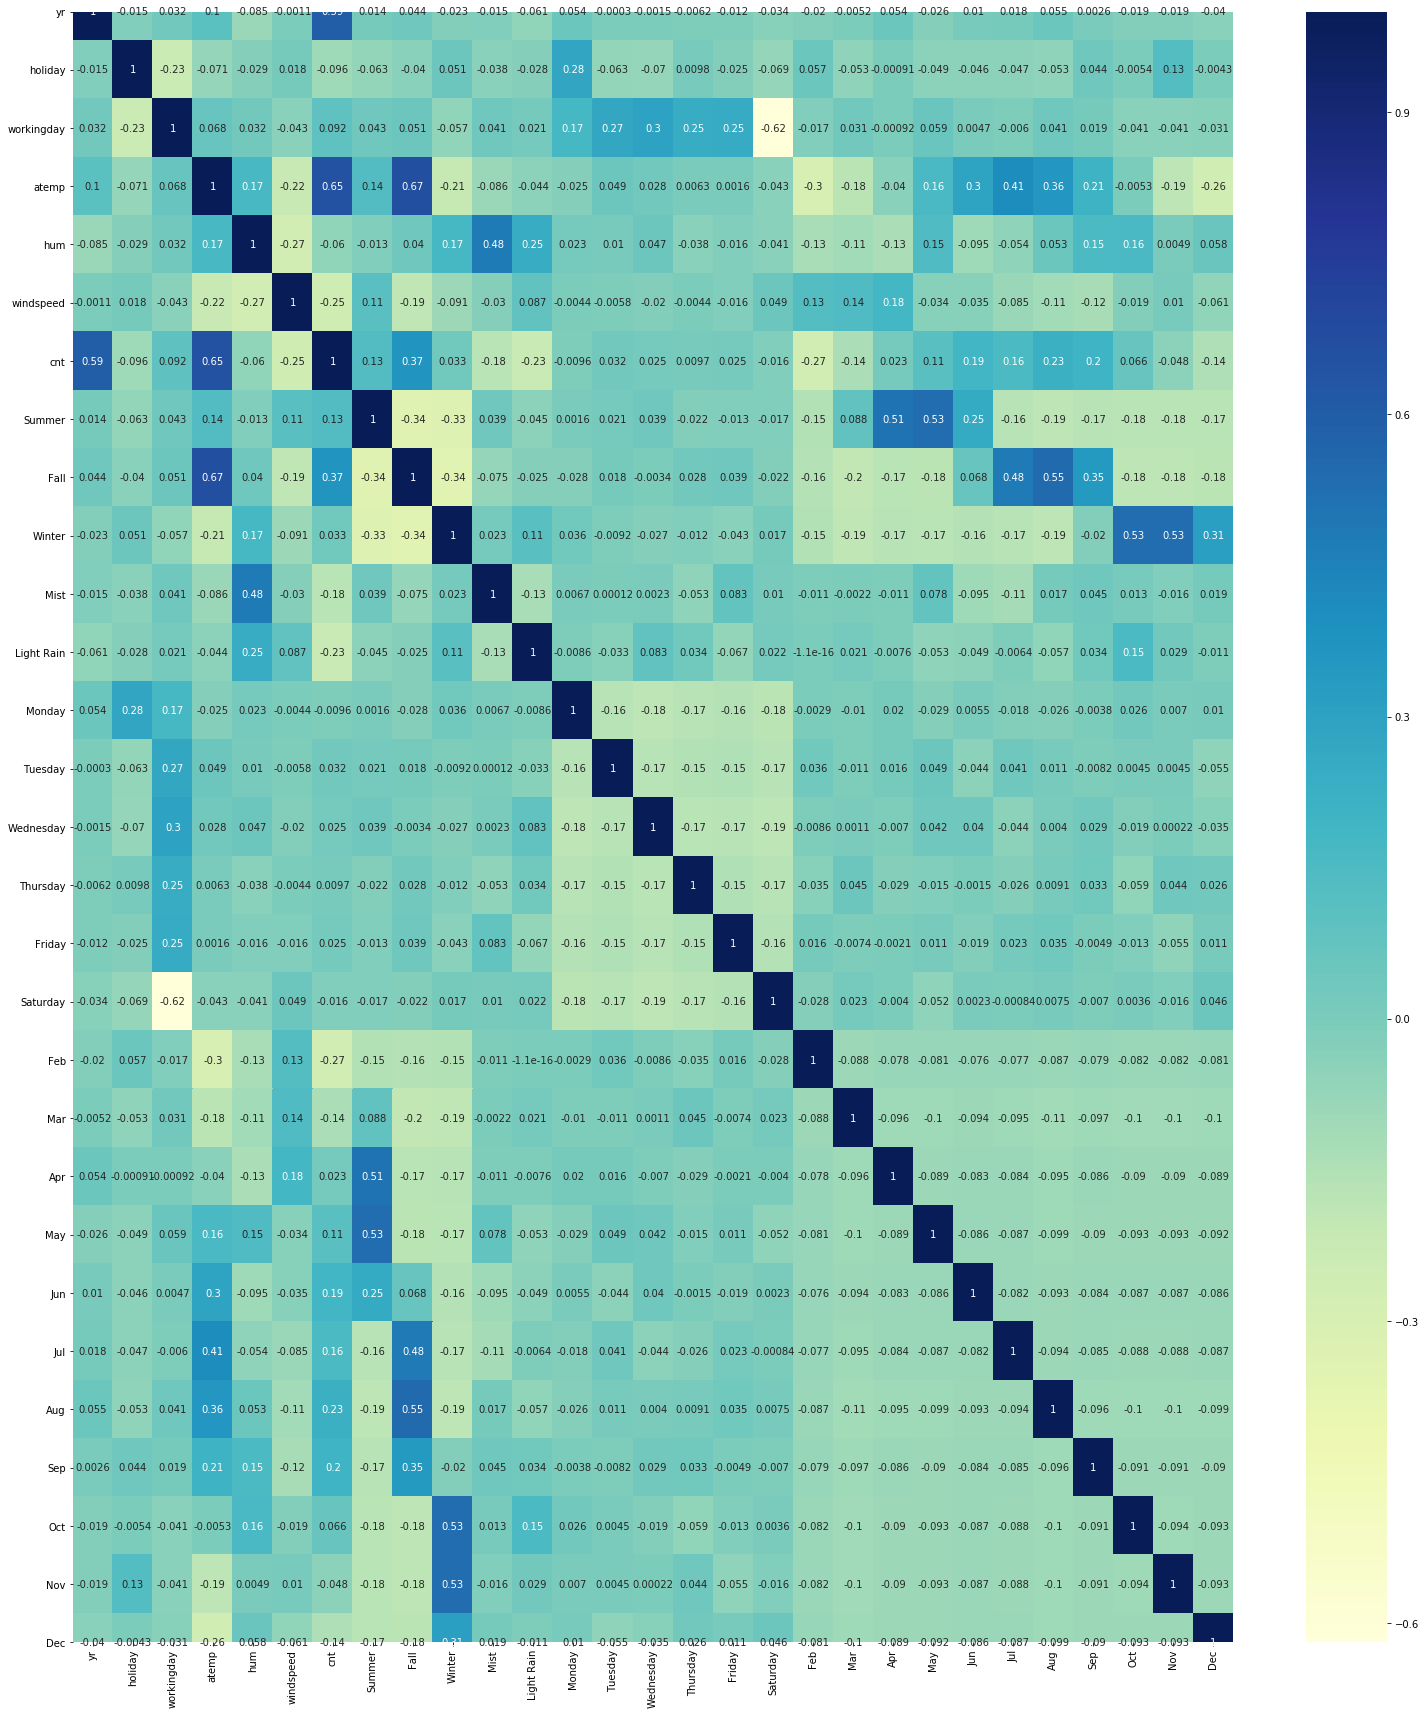

In [29]:
plt.figure(figsize = (26, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**We plotted the heatmap just to see where the highest correlation is observed**
- Obvious correlations include the seasonal changes with respect to months
- Second, we see that the count is slightly dependent on light rains, winter, temperature, etc


In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

In [31]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,Summer,Fall,Winter,Mist,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


## Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)
Plus, reducing the number of features to 10 with RFE reduces some variables off the list for easier computation too, and more accuracy- 

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Summer', True, 1),
 ('Fall', True, 1),
 ('Winter', True, 1),
 ('Mist', True, 1),
 ('Light Rain', True, 1),
 ('Monday', False, 10),
 ('Tuesday', False, 11),
 ('Wednesday', False, 13),
 ('Thursday', False, 14),
 ('Friday', False, 12),
 ('Saturday', True, 1),
 ('Feb', False, 7),
 ('Mar', False, 3),
 ('Apr', False, 5),
 ('May', False, 2),
 ('Jun', False, 4),
 ('Jul', False, 6),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 8),
 ('Dec', False, 9)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Summer',
       'Fall', 'Winter', 'Mist', 'Light Rain', 'Saturday', 'Aug', 'Sep',
       'Oct'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec'],
      dtype='object')

In [36]:
X_train_rfe = X_train[col]

### Building a model throught stats model API
- We retrain the model again with statsmodel.api to get a summary of how every variable is affecting the model
- After RFE, our next step is to see whether all p-value and VIF are doing great with respect to the model
- The removal of taxing variables can be done in the order of - 
<ol>
<li>high p - value and high VIF</li>
<li>high p - value and low VIF</li>
<li>low p - value and high VIF</li>
<li>low p - value and low VIf</li>
   </ol>

In [37]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_rfe).fit()

lr_1.params

const         1706.458060
yr            2011.095877
holiday       -440.045193
workingday     391.101471
atemp         4276.664074
hum          -1402.100013
windspeed    -1427.950265
Summer        1085.007761
Fall           435.367290
Winter        1247.391120
Mist          -522.541036
Light Rain   -2160.652347
Saturday       464.504501
Aug            467.041933
Sep           1012.209747
Oct            405.644235
dtype: float64

In [38]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.5
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          8.04e-189
Time:                        23:47:29   Log-Likelihood:                -4112.0
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     494   BIC:                             8324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1706.4581    253.012      6.745      0.0

### Checking for VIF

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.62
8,Fall,5.65
4,atemp,3.42
7,Summer,2.55
9,Winter,2.18
5,hum,1.92
3,workingday,1.88
12,Saturday,1.79
13,Aug,1.69
10,Mist,1.57


#### Removing holiday first - high p - value and low VIF

In [41]:
X_train_rfe.drop("holiday", axis=1, inplace=True)
lr_2 = sm.OLS(y_train, X_train_rfe).fit()

lr_2.params

const         1629.020054
yr            2012.634922
workingday     456.554511
atemp         4280.828237
hum          -1393.173623
windspeed    -1433.054280
Summer        1094.723153
Fall           444.843514
Winter        1244.457168
Mist          -520.324446
Light Rain   -2155.376930
Saturday       530.921110
Aug            466.559371
Sep            995.501349
Oct            416.115809
dtype: float64

In [42]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          3.18e-189
Time:                        23:47:29   Log-Likelihood:                -4113.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1629.0201    250.188      6.511      0.0

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.17
7,Fall,5.65
3,atemp,3.42
6,Summer,2.54
8,Winter,2.18
4,hum,1.92
12,Aug,1.69
2,workingday,1.65
11,Saturday,1.65
9,Mist,1.57


#### Removing Fall  - high VIF (above 5) and low p - value

In [44]:
X_train_rfe.drop("Fall", axis=1, inplace=True)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()

lr_3.params

const         1619.806389
yr            1999.908340
workingday     454.875448
atemp         4809.615901
hum          -1499.733481
windspeed    -1466.747324
Summer         889.081985
Winter        1113.730256
Mist          -506.909847
Light Rain   -2092.631978
Saturday       527.256190
Aug            610.586497
Sep           1116.508174
Oct            370.341052
dtype: float64

In [45]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          3.18e-189
Time:                        23:47:29   Log-Likelihood:                -4113.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1629.0201    250.188      6.511      0.0

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.16
4,hum,1.88
7,Winter,1.71
2,workingday,1.65
10,Saturday,1.65
8,Mist,1.57
3,atemp,1.56
13,Oct,1.49
11,Aug,1.42
6,Summer,1.39


#### Now, everything adheres to the value of VIF and p- value

Our, attempt is limited to removing variables logically and with business perspective in mind
First would be October and August, both have got high VIF value than September, plus the p - value of October is more than Sept
It makes a logical sense to retain Sept and remove the adjoining months August and October, and not affect the value of R^2 (and just consider one variable that affects as a sample)


In [47]:
X_train_rfe.drop("Oct", axis=1, inplace=True)
X_train_rfe.drop("Aug", axis=1, inplace=True)
lr_4 = sm.OLS(y_train, X_train_rfe).fit()

lr_4.params

const         1474.478383
yr            2003.115624
workingday     466.727298
atemp         5226.011587
hum          -1429.439324
windspeed    -1459.055971
Summer         728.066473
Winter        1146.350371
Mist          -480.505437
Light Rain   -2059.249616
Saturday       547.483688
Sep            900.969041
dtype: float64

In [48]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.6
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          1.18e-186
Time:                        23:47:29   Log-Likelihood:                -4128.2
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     498   BIC:                             8331.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1474.4784    254.345      5.797      0.0

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.25
4,hum,1.88
2,workingday,1.65
10,Saturday,1.64
8,Mist,1.56
3,atemp,1.28
7,Winter,1.24
9,Light Rain,1.24
6,Summer,1.20
5,windspeed,1.19


#### Mist can be removed off this list
- We can see from the barplot above between various weathersituations that between Mist and Light rain, we see that the median of light rain is down (which also means that light rain affects people to rent less bikes during the rain). It is important with respect to business perspective because light rain would affect the bike rental demand more than what mist does. So we keep light rain and removing mist shouldn't make any big of an impact.

In [50]:
X_train_rfe.drop("Mist", axis=1, inplace=True)
lr_5 = sm.OLS(y_train, X_train_rfe).fit()

lr_5.params

const         1916.690865
yr            1984.632484
workingday     420.969961
atemp         5453.457561
hum          -2419.050253
windspeed    -1607.527859
Summer         713.699391
Winter        1184.604795
Light Rain   -1664.743875
Saturday       491.525488
Sep            886.894511
dtype: float64

In [51]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.8
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          2.73e-182
Time:                        23:47:29   Log-Likelihood:                -4141.4
No. Observations:                 510   AIC:                             8305.
Df Residuals:                     499   BIC:                             8351.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1916.6909    245.344      7.812      0.0

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.38
2,workingday,1.64
9,Saturday,1.63
4,hum,1.25
7,Winter,1.23
3,atemp,1.21
6,Summer,1.20
5,windspeed,1.17
8,Light Rain,1.11
10,Sep,1.11


### We can remove Saturday 
- Saturday can be removed because the information is captured in the working day variable and that can help reduce variable to 9. Also, we can see in the barplot that non- working day has its 25th percentile lesser than that of working day. This information is not captured in the weekdays variable clearly. So, it is better to consider workingday in replacement to Saturday, and it doesn't make much of an impact to the model accuracy


In [53]:
X_train_rfe.drop("Saturday", axis=1, inplace=True)
lr_6 = sm.OLS(y_train, X_train_rfe).fit()

lr_6.params

const         2171.499314
yr            1979.382156
workingday     185.419085
atemp         5456.104251
hum          -2453.863538
windspeed    -1595.880350
Summer         716.323859
Winter        1178.378843
Light Rain   -1620.774054
Sep            893.125379
dtype: float64

In [54]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.6
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          2.20e-180
Time:                        23:47:29   Log-Likelihood:                -4148.8
No. Observations:                 510   AIC:                             8318.
Df Residuals:                     500   BIC:                             8360.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2171.4993    239.328      9.073      0.0

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.03
4,hum,1.25
7,Winter,1.23
3,atemp,1.21
6,Summer,1.20
5,windspeed,1.17
8,Light Rain,1.11
9,Sep,1.11
1,yr,1.02
2,workingday,1.01


**Wohhoooo made it  9 variables, without affecting much of a difference in R - value or adjusted R - value**

In [56]:
(0.821 - 0.818)/0.821 * 100

0.3654080389768578

**The difference in the R - value and adjusted R- value is about 0.364% and this happens since neither of the variable chosen is negating the R- value or the precision of the model**

### Capturing the error Residual Analysis of the train data

So, now to check if the error terms are also normally distributed, we plot the histogram of the error term. We see that it is normally distributed as per the linear regression model assumption with a mean = 0

In [57]:
y_train_pred = lr_6.predict(X_train_rfe)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

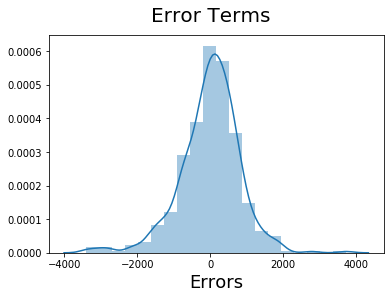

In [59]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Error pattern
We see that the error pattern is discontinuous and random, so it proves another point of assumptions of the linear regression, being error terms is independent of each other!

Text(0.5, 0, 'y predicted')

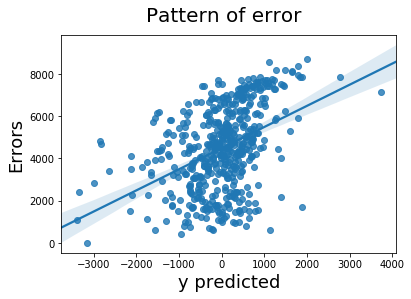

In [75]:
fig = plt.figure()
sns.regplot(x = (y_train - y_train_pred), y = y_train)
fig.suptitle('Pattern of error', fontsize = 20)                  # Plot heading 
plt.ylabel('Errors', fontsize = 18) 
plt.xlabel('y predicted', fontsize = 18)

**This graph down below explains that our error terms are homoscedastic as the error terms are distributed in the similar pattern throughout the existance of prediction(y) terms**

Text(0.5, 0, 'y predicted')

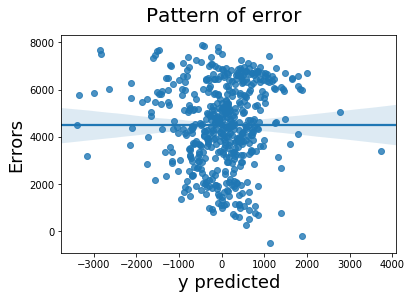

In [76]:
fig = plt.figure()
sns.regplot(x = (y_train - y_train_pred), y = y_train_pred)
fig.suptitle('Pattern of error', fontsize = 20)                  # Plot heading 
plt.ylabel('Errors', fontsize = 18) 
plt.xlabel('y predicted', fontsize = 18)

## Making predictions on the test set
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets, just transforming it based on the fit on train data

In [60]:
num_vars = ['atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [61]:
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
#X_test.drop("Aug", axis=1, inplace=True)

In [63]:
X_train_rfe.drop("const", axis = 1, inplace = True)
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

### Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [64]:
y_pred = lr_6.predict(X_test_new)

Text(0, 0.5, 'y_pred')

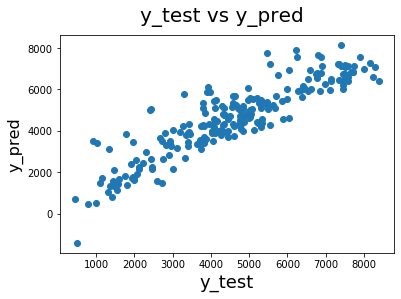

In [65]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### List of all the variables impacting the model whose absolute coefficient in the decreasing order 

In [77]:
gm = dict(lr_6.params)
print(gm)

{'const': 2171.499313860918, 'yr': 1979.3821564168732, 'workingday': 185.4190848512994, 'atemp': 5456.104250557284, 'hum': -2453.8635380077326, 'windspeed': -1595.8803501774273, 'Summer': 716.3238587222664, 'Winter': 1178.3788434900384, 'Light Rain': -1620.7740536933597, 'Sep': 893.1253786053842}


In [67]:
sorted(gm, key=lambda k: abs(gm[k]), reverse = True)

['atemp',
 'hum',
 'const',
 'yr',
 'Light Rain',
 'windspeed',
 'Winter',
 'Sep',
 'Summer',
 'workingday']

**The list of variables (based on their coefficients) affecting the model accuracy are**
- atemp (felt temperature)
- hum (humidity of the region)
- yr (year - 2018 or 19)
- Light Rain 
- Windspeed
- Winter
- Sep (September month) 
- Summer 
- workingday

----------------------------------------------------------------------------------------

- atemp : Felt temperature affects the target variable count, in a fairly linear manner according to pair plot, saying that more people are interested to buy shared bikes rather not in the cold temperatures
- hum : Humidity is the second most affecting variable, and observe that the coefficient is negative. Higher the humidity lesser is the demand
- yr : Seeing from the boxplot, the company has seen a year-on-year sales increase possibly also because of other factors apart from this
- Light rain : Nobody wants to ride bike in the light rain weather situation. This point is acknowledged by the dataset by giving it a strong negative coefficient.
- Windspeed : Windspeed too negatively affects the bike demand and thus, it's likely that the customer demand decreases with increased windspeed
- Winter : Winter season affects the demand of bikes positively. Much likely that holidays come in winter season and people tend to visit other people during this time.
- Sep : The coefficient is less than the other factors, but found to be significantly more than the other months. Might be because the fall season had seen the highest demand (in the boxplot for seasons). This month is the onset of Fall season.
- Summer : Summer is also a factor that is significantly affecting the sales. It is fairly easier for people to travel around is summer, and probably is the reason for the increase in the sales too. Trivially!
- workingday : It is seen that workingday has a positive relationship with bike demand. Also, observe that the significance is less than the other variables. 